Kth largest/smallest element in Binary Search Tree

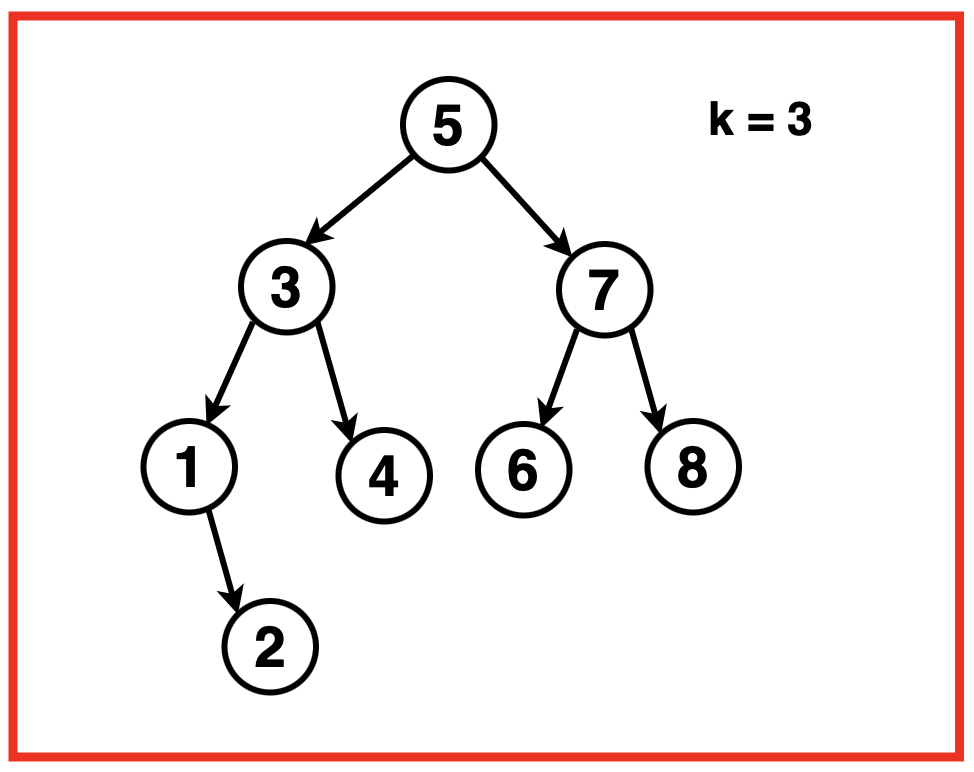

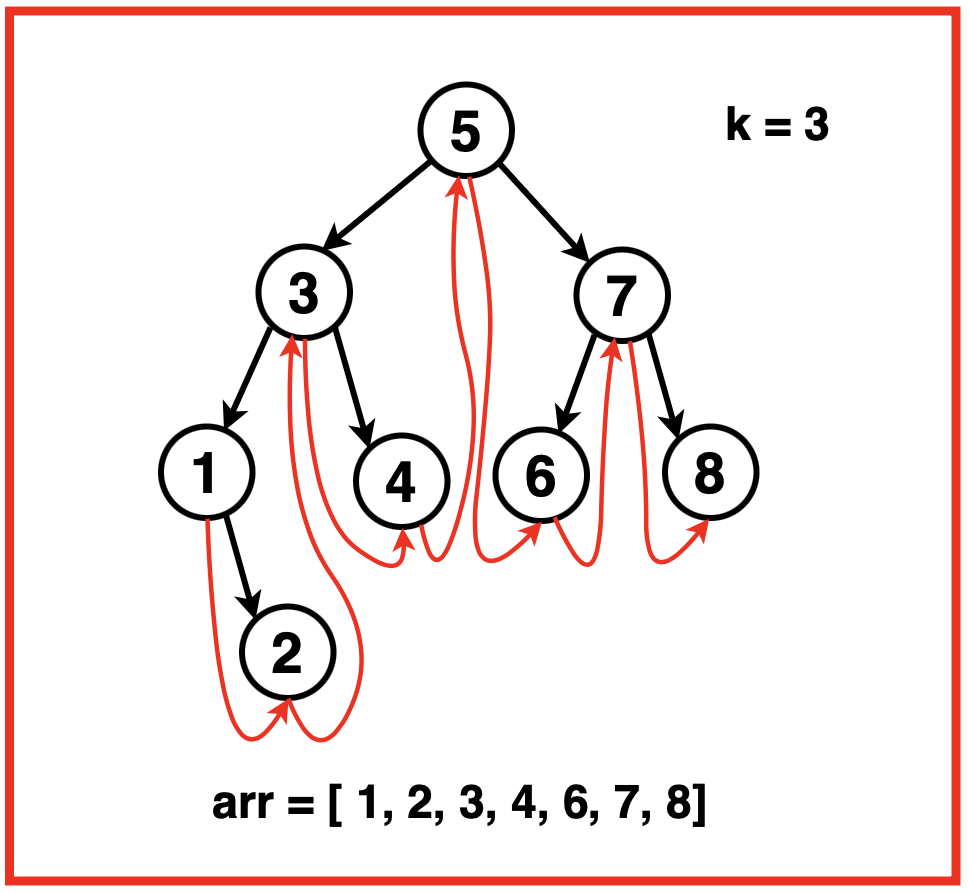

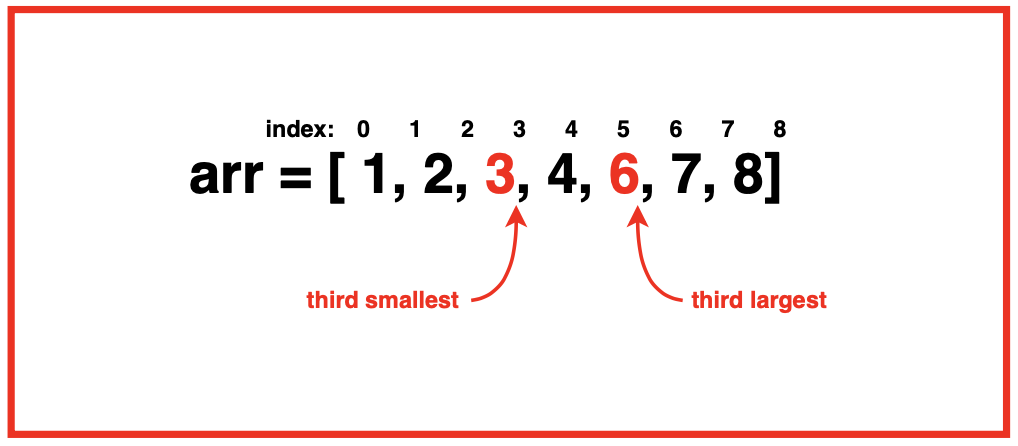

In [1]:
# Definition of TreeNode structure
# for a binary tree node
class TreeNode:
    # Constructor to initialize the node with a
    # value and set left and right pointers to null
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [2]:
# Creating a BST
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(13)
root.left.left = TreeNode(3)
root.left.left.left = TreeNode(2)
root.left.left.right = TreeNode(4)
root.left.right = TreeNode(6)
root.left.right.right = TreeNode(9)
root.right.left = TreeNode(11)
root.right.right = TreeNode(14)


In [3]:
def print_tree(root):
    templ = None
    tempr = None
    if root.left is not None:
        print(f'rt->{root.val}, lc->{root.left.val}')
        templ = root.left
    if root.right is not None:
        print(f'rt->{root.val}, rc->{root.right.val}')
        tempr = root.right
    if templ is not None:
        print_tree(templ)
    if tempr is not None:
        print_tree(tempr)
        

In [4]:
print_tree(root)

rt->10, lc->5
rt->10, rc->13
rt->5, lc->3
rt->5, rc->6
rt->3, lc->2
rt->3, rc->4
rt->6, rc->9
rt->13, lc->11
rt->13, rc->14


In [8]:
def printInOrder(root):
    # Check if the current node
    # is null (base case for recursion)
    if not root:
        # If null, return and
        # terminate the function
        return
    
    # Recursively call printInOrder
    # for the left subtree
    printInOrder(root.left)
    
    # Print the value of the current node
    print(root.val, end=" ")

    # Recursively call printInOrder
    # for the right subtree
    printInOrder(root.right)

In [9]:
print("Binary Search Tree:")
printInOrder(root)
print()

Binary Search Tree:
2 3 4 5 6 9 10 11 13 14 


In [10]:
class Solution:
    # Inorder traversal to populate
    # the list with BST elements
    def inorder(self, node, arr):
        if not node:
            return
        # Recursive call to the left subtree
        self.inorder(node.left, arr)
        
        # Append the value of current
        # node into the list
        arr.append(node.val)
        
        # Recursive call to the right subtree
        self.inorder(node.right, arr)
        return

    # Function to find the Kth
    # smallest and largest elements in BST
    def findKth(self, node, k):
        # List to store the
        # elements of the BST
        arr = []
        
        # Perform inorder traversal
        # to populate the list
        self.inorder(node, arr)
        
        # Calculate Kth largest
        # and smallest elements
        kLargest = arr[len(arr) - k]# 3rd index 2
        kSmallest = arr[k - 1]
        
        # Returning a tuple containing
        # Kth smallest and largest elements
        return (kSmallest, kLargest)



In [11]:
solution = Solution()

# Find the Kth smallest and largest elements
k = 3
print("k:", k)
kthElements = solution.findKth(root, k)


k: 3


In [12]:
print("Kth smallest element:", kthElements[0])
print("Kth largest element:", kthElements[1])

Kth smallest element: 4
Kth largest element: 11


Time Complexity: O(N) where N is the number of nodes in the Binary Search Tree. because traversing the entire BST to perform an inorder traversal takes linear time. We visit each node once resulting in time complexity proportional to the number of nodes in the BST.

Space Complexity : O(N) where N is the number of nodes in the Binary Search Tree as additional space is required to store the elements of the BST in an array.

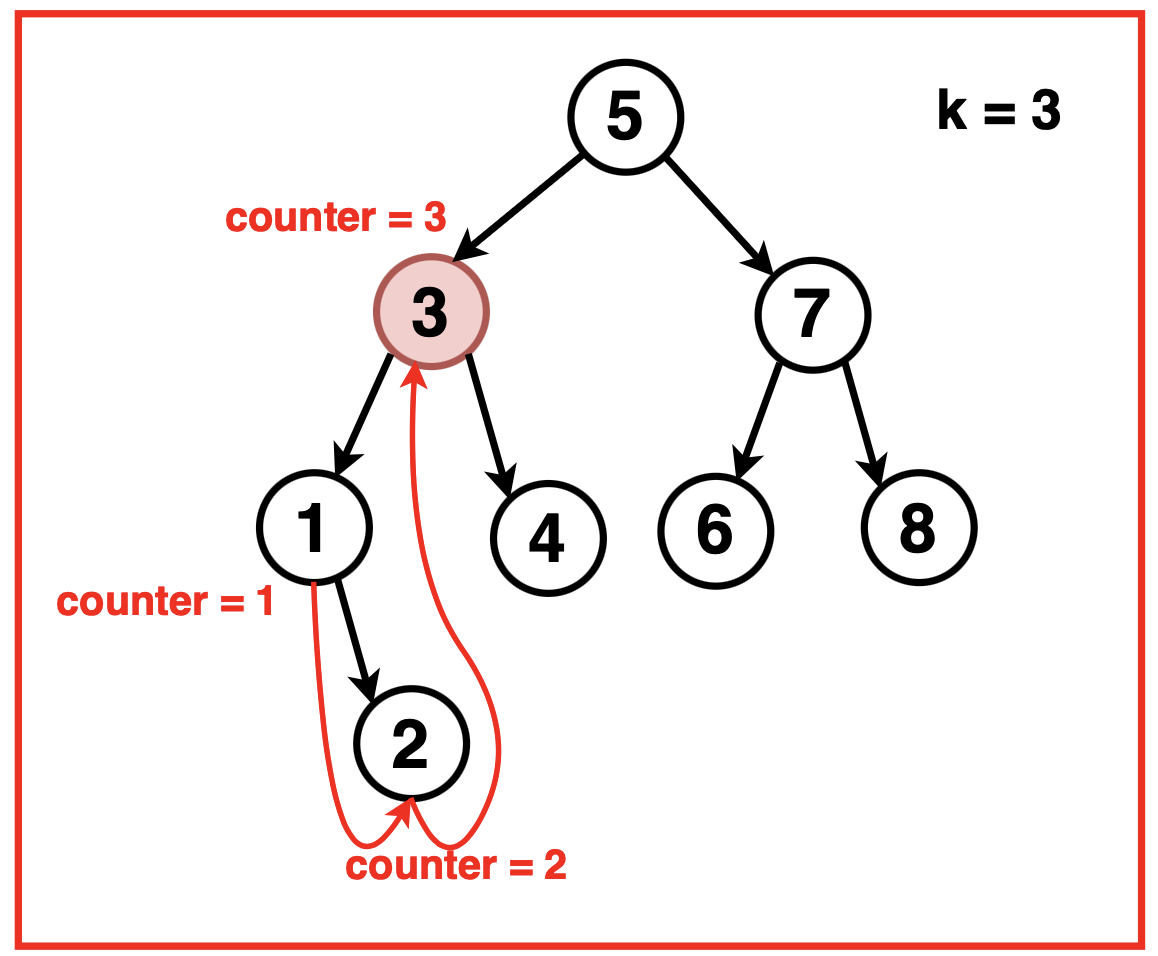

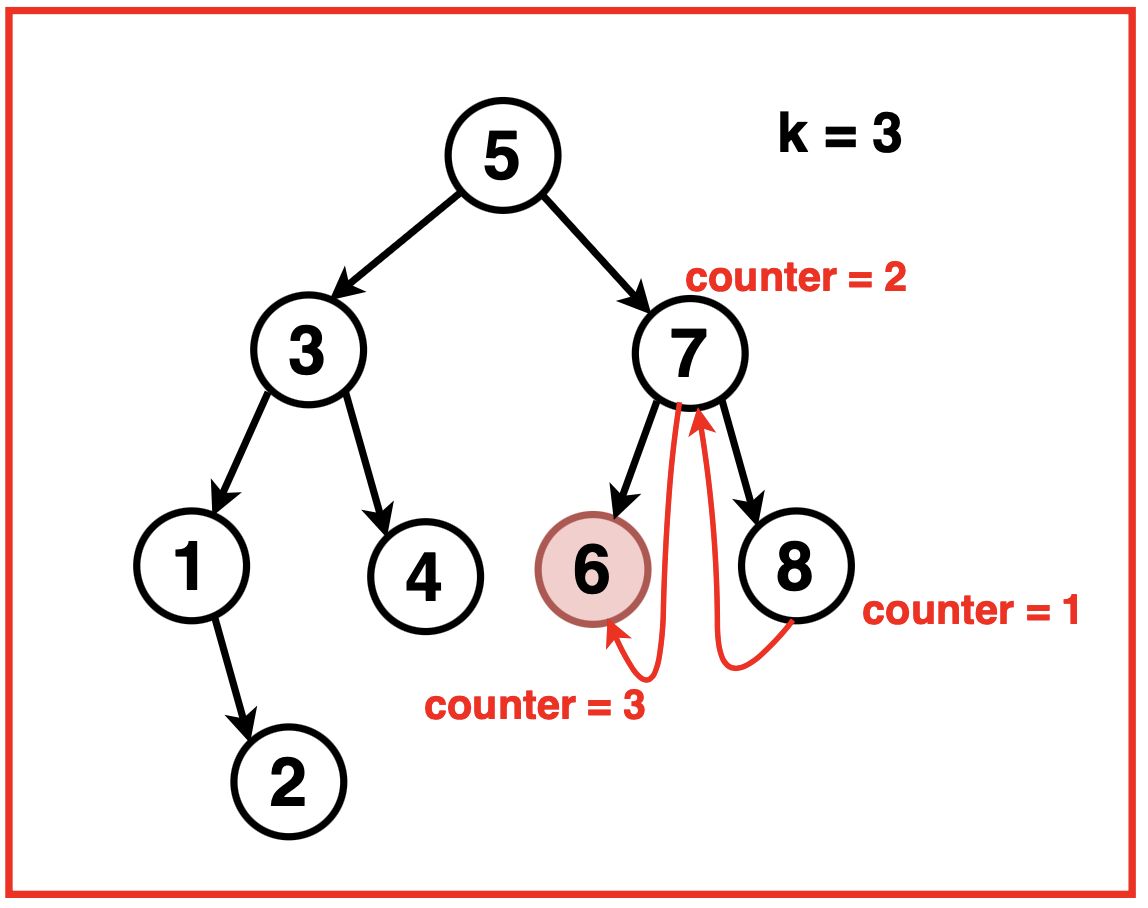

In [13]:
class Solution:
    def __init__(self):
        pass

    # Helper function to perform reverse inorder
    # traversal to find Kth largest element
    def reverse_inorder(self, node, counter, k, k_largest):
        if not node or counter[0] >= k:
            return
        
        # Traverse right subtree
        self.reverse_inorder(node.right, counter, k, k_largest)

        # Increment counter after
        # visiting right subtree
        counter[0] += 1

        # Check if current node
        # is the Kth largest
        if counter[0] == k:
            k_largest[0] = node.val
            return

        # Traverse left subtree if
        # Kth largest is not found yet
        self.reverse_inorder(node.left, counter, k, k_largest)

    # Helper function to perform inorder
    # traversal to find Kth smallest element
    def inorder(self, node, counter, k, k_smallest):
        if not node or counter[0] >= k:
            return

        # Traverse left subtree
        self.inorder(node.left, counter, k, k_smallest)

        # Increment counter after visiting left subtree
        counter[0] += 1

        # Check if current node is the Kth smallest
        if counter[0] == k:
            k_smallest[0] = node.val
            return

        # Traverse right subtree if
        # Kth smallest is not found yet
        self.inorder(node.right, counter, k, k_smallest)

    def find_kth(self, root, k):
        k_smallest = [float('inf')]
        k_largest = [float('-inf')]
        # Counter to track visited nodes
        counter = [0]                                                                                                                                                      

        # Find Kth smallest element
        # (perform inorder traversal)
        self.inorder(root, counter, k, k_smallest)
        
        # Reset counter for Kth largest element
        counter[0] = 0
        # Find Kth largest element
        # (perform reverse inorder traversal)
        self.reverse_inorder(root, counter, k, k_largest)

        return k_smallest[0], k_largest[0]

In [14]:
solution = Solution()

# Find the Kth smallest and largest elements
k = 3
print("k:", k)
kth_elements = solution.find_kth(root, k)

print("Kth smallest element:", kth_elements[0])
print("Kth largest element:", kth_elements[1])

k: 3
Kth smallest element: 4
Kth largest element: 11


Time Complexity: O(N) where N is the number of nodes in the Binary Search Tree as we traverse in inorder and reverse inorder fashion to get to the required nodes. We visit each node once resulting in time complexity proportional to the number of nodes in the BST.

Space Complexity : as no additional space is allocated or data structures used to store any values.